https://www.kaggle.com/danimal/heartdiseaseensembleclassifier

In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from typing import Dict, Tuple
from IPython.display import Image

from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import ExtraTreesClassifier, ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score


In [2]:
data = pd.read_csv("data/Heart_Disease_Data.csv", sep=',')
data.dtypes

age                 int64
sex                 int64
cp                  int64
trestbps            int64
chol                int64
fbs                 int64
restecg             int64
thalach             int64
exang               int64
oldpeak           float64
slop                int64
ca                 object
thal               object
pred_attribute      int64
dtype: object

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slop,ca,thal,pred_attribute
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [19]:
data2 = data.copy()
data2 = data2.drop(data2[data2.ca == '?'].index)
data2 = data2.drop(data2[data2.thal == '?'].index)
data2['ca'] = data2['ca'].astype(int)
data2['thal'] = data2['thal'].astype(int)

<AxesSubplot:>

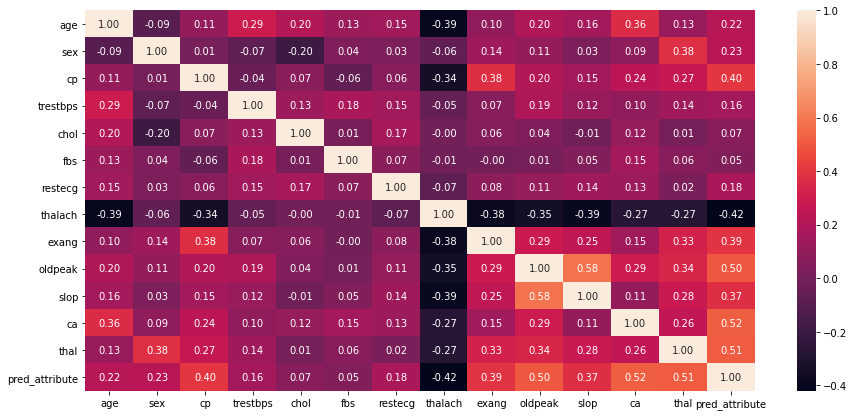

In [21]:
fig, ax = plt.subplots(figsize=(15,7))
sns.heatmap(data2.corr(method='pearson'), ax=ax, annot=True, fmt='.2f')

In [45]:
feature_cols = [
    'age',	'cp',	'trestbps',	'chol',	'fbs',	'restecg',	'thalach',	'exang',	'oldpeak',	'slop',	'ca',	'thal',	'pred_attribute'
]
data_X = data2.loc[:,feature_cols]
data_Y = data2.loc[:, 'sex']
data_X_train, data_X_test, data_y_train, data_y_test = train_test_split(
    data_X, data_Y,test_size=0.2, random_state=1)

In [46]:
# Обучим классификатор на 15 деревьях
bc1 = BaggingClassifier(n_estimators=15, oob_score=True, random_state=10)
bc1.fit(data_X_train, data_y_train)

BaggingClassifier(n_estimators=15, oob_score=True, random_state=10)

In [47]:
bc1_y_test_predict = bc1.predict(data_X_test)
mean_absolute_error(data_y_test, bc1_y_test_predict), mean_squared_error(data_y_test, bc1_y_test_predict)

(0.23333333333333334, 0.23333333333333334)

In [48]:
# Обучим классификатор на 15 деревьях
tree1 = RandomForestClassifier(n_estimators=15, oob_score=True, random_state=10)
tree1.fit(data_X_train, data_y_train)

RandomForestClassifier(n_estimators=15, oob_score=True, random_state=10)

In [49]:
tree1_y_test_predict = tree1.predict(data_X_test)
mean_absolute_error(data_y_test, tree1_y_test_predict), mean_squared_error(data_y_test, tree1_y_test_predict)

(0.23333333333333334, 0.23333333333333334)

In [50]:
# Обучим классификатор на 15 деревьях
ab1 = AdaBoostClassifier(n_estimators=15, algorithm='SAMME', random_state=10)
ab1.fit(data_X_train, data_y_train)

AdaBoostClassifier(algorithm='SAMME', n_estimators=15, random_state=10)

In [51]:
ab1_y_test_predict = ab1.predict(data_X_test)
mean_absolute_error(data_y_test, ab1_y_test_predict), mean_squared_error(data_y_test, ab1_y_test_predict)

(0.31666666666666665, 0.31666666666666665)

In [52]:
# Обучим классификатор
gb1 = GradientBoostingClassifier(random_state=10)
gb1.fit(data_X_train, data_y_train)

GradientBoostingClassifier(random_state=10)

In [53]:
gb1_y_test_predict = gb1.predict(data_X_test)
mean_absolute_error(data_y_test, gb1_y_test_predict), mean_squared_error(data_y_test, gb1_y_test_predict)

(0.21666666666666667, 0.21666666666666667)